# Covid-19 - Ontario

### By Alexandre Dietrich

#### April 16, 2020

The datasets were downloaded from the o official Ontario site. 

https://data.ontario.ca/dataset?keywords_en=COVID-19

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset: Confirmed positive cases of COVID19 in Ontario

In [2]:
df = pd.read_csv("conposcovidloc.csv")
df.head()

,ROW_ID,ACCURATE_EPISODE_DATE,Age_Group,CLIENT_GENDER,CASE_ACQUISITIONINFO,OUTCOME1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-03-17,80s,FEMALE,Travel-Related,Fatal,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
1,2,2020-03-26,60s,FEMALE,Neither,Resolved,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2,3,2020-03-17,30s,MALE,Travel-Related,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
3,4,2020-03-21,40s,MALE,Neither,Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
4,5,2020-03-14,40s,MALE,Neither,Resolved,Hamilton Public Health Services,"110 King St. West, 2nd Floor",Hamilton,L8P 4S6,www.hamilton.ca/publichealth,43.257631,-79.871341


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 13 columns):
ROW_ID                       8961 non-null int64
ACCURATE_EPISODE_DATE        8961 non-null object
Age_Group                    8961 non-null object
CLIENT_GENDER                8961 non-null object
CASE_ACQUISITIONINFO         8961 non-null object
OUTCOME1                     8961 non-null object
Reporting_PHU                8961 non-null object
Reporting_PHU_Address        8961 non-null object
Reporting_PHU_City           8961 non-null object
Reporting_PHU_Postal_Code    8961 non-null object
Reporting_PHU_Website        8961 non-null object
Reporting_PHU_Latitude       8961 non-null float64
Reporting_PHU_Longitude      8961 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 910.2+ KB


In [4]:
df.columns = ['id', 'date', 'agegrp', 'gender', 'info', 
              'outcome', 'phu', 'address', 'city', 'zipcode', 'website', 'latitude', 'longitude']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 13 columns):
id           8961 non-null int64
date         8961 non-null object
agegrp       8961 non-null object
gender       8961 non-null object
info         8961 non-null object
outcome      8961 non-null object
phu          8961 non-null object
address      8961 non-null object
city         8961 non-null object
zipcode      8961 non-null object
website      8961 non-null object
latitude     8961 non-null float64
longitude    8961 non-null float64
dtypes: float64(2), int64(1), object(10)
memory usage: 910.2+ KB


In [5]:
df['date'].value_counts().sort_index(ascending=False)

2020-04-15     42
2020-04-14     78
2020-04-13    233
2020-04-12    218
2020-04-11    359
             ... 
2020-02-05      1
2020-02-01      1
2020-01-24      1
2020-01-22      1
2020-01-21      1
Name: date, Length: 67, dtype: int64

In [6]:
df[df['city'] == 'Toronto']['date'].value_counts().sort_index(ascending=False)

2020-04-15      2
2020-04-14     17
2020-04-13     35
2020-04-12     51
2020-04-11    117
2020-04-10    127
2020-04-09     97
2020-04-08    117
2020-04-07    168
2020-04-06    158
2020-04-05     87
2020-04-04     79
2020-04-03     96
2020-04-02    117
2020-04-01    120
2020-03-31     75
2020-03-30     65
2020-03-29     52
2020-03-28     42
2020-03-27     60
2020-03-26     67
2020-03-25     52
2020-03-24     52
2020-03-23     50
2020-03-22     28
2020-03-21     41
2020-03-20     45
2020-03-19     30
2020-03-18     47
2020-03-17     61
2020-03-16     37
2020-03-15     31
2020-03-14     29
2020-03-13     27
2020-03-12     20
2020-03-11     19
2020-03-10     19
2020-03-09     14
2020-03-08      8
2020-03-07      8
2020-03-06      6
2020-03-05      6
2020-03-04      5
2020-03-03      7
2020-03-02      6
2020-03-01      2
2020-02-29      1
2020-02-28      1
2020-02-26      2
2020-02-24      1
2020-02-21      1
2020-02-20      2
2020-02-16      1
2020-02-15      1
2020-02-14      2
2020-02-05

In [7]:
cityname = df['city'].value_counts()
cityname

Toronto             2414
Mississauga         1195
Newmarket            842
Ottawa               650
Whitby               463
Windsor              398
Oakville             347
Thorold              314
Hamilton             292
London               250
Brockville           248
Waterloo             234
Barrie               169
Guelph               167
Simcoe               145
Port Hope            131
Point Edward         126
Brantford             71
Cornwall              64
Kingston              54
Peterborough          53
Timmins               42
Owen Sound            40
Sudbury               39
St. Thomas            37
Thunder Bay           34
Stratford             33
Belleville            28
Chatham               25
Pembroke              14
North Bay             12
New Liskeard          10
Sault Ste. Marie      10
Kenora                10
Name: city, dtype: int64

In [8]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8961 entries, 0 to 8960
Data columns (total 13 columns):
id           8961 non-null int64
date         8961 non-null datetime64[ns]
agegrp       8961 non-null object
gender       8961 non-null object
info         8961 non-null object
outcome      8961 non-null object
phu          8961 non-null object
address      8961 non-null object
city         8961 non-null object
zipcode      8961 non-null object
website      8961 non-null object
latitude     8961 non-null float64
longitude    8961 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 910.2+ KB


In [9]:
city = df.groupby(['latitude', 'longitude'])['city'].count()
lat = city.index.get_level_values('latitude').to_numpy()
long = city.index.get_level_values('longitude').to_numpy()
size = city.values
size

array([ 398,   25,   37,  145,  250,  126,  314,   71,  292,   33,  347,
        234,  167, 1195, 2414,  463,  131,  842,   28,   54,   53,  169,
         40,  248,   64,  650,   14,   12,   39,   10,   10,   34,   42,
         10])

In [10]:
cityname = cityname.head(11)
cityname = cityname.sort_values(ascending=True)
cityname

Brockville      248
London          250
Hamilton        292
Thorold         314
Oakville        347
Windsor         398
Whitby          463
Ottawa          650
Newmarket       842
Mississauga    1195
Toronto        2414
Name: city, dtype: int64

In [11]:
outcome = df[df['city'] == 'Toronto'].groupby('outcome')['outcome'].count()
lastdate = df[df['city'] == 'Toronto']['date'].max().date()
lastdate

datetime.date(2020, 4, 15)

In [12]:
agegrp = df[(df['date'] >= '2020-03-01') & (df['city'] == 'Toronto')].groupby('agegrp')['agegrp'].count()
agegrp

agegrp
20s        257
30s        317
40s        358
50s        381
60s        291
70s        211
80s        323
90s        238
<20         22
Unknown      1
Name: agegrp, dtype: int64

In [13]:
cumulative = df[(df['date'] >= '2020-03-01') & (df['city'] == 'Toronto')].groupby('date')['date'].count().cumsum()

In [14]:
byday = df[(df['date'] >= '2020-03-01') & (df['city'] == 'Toronto')].groupby('date')['date'].count()
bydaychg = df[(df['date'] >= '2020-03-01') & (df['city'] == 'Toronto')].groupby('date')['date'].count().pct_change()

In [15]:
bydaychg

date
2020-03-01         NaN
2020-03-02    2.000000
2020-03-03    0.166667
2020-03-04   -0.285714
2020-03-05    0.200000
2020-03-06    0.000000
2020-03-07    0.333333
2020-03-08    0.000000
2020-03-09    0.750000
2020-03-10    0.357143
2020-03-11    0.000000
2020-03-12    0.052632
2020-03-13    0.350000
2020-03-14    0.074074
2020-03-15    0.068966
2020-03-16    0.193548
2020-03-17    0.648649
2020-03-18   -0.229508
2020-03-19   -0.361702
2020-03-20    0.500000
2020-03-21   -0.088889
2020-03-22   -0.317073
2020-03-23    0.785714
2020-03-24    0.040000
2020-03-25    0.000000
2020-03-26    0.288462
2020-03-27   -0.104478
2020-03-28   -0.300000
2020-03-29    0.238095
2020-03-30    0.250000
2020-03-31    0.153846
2020-04-01    0.600000
2020-04-02   -0.025000
2020-04-03   -0.179487
2020-04-04   -0.177083
2020-04-05    0.101266
2020-04-06    0.816092
2020-04-07    0.063291
2020-04-08   -0.303571
2020-04-09   -0.170940
2020-04-10    0.309278
2020-04-11   -0.078740
2020-04-12   -0.564103
2020-0

In [16]:
outcomeOnt = df.groupby('outcome')['outcome'].count()
lastdateOnt = df['date'].max().date()
lastdateOnt

datetime.date(2020, 4, 15)

In [17]:
agegrpOnt = df[df['date'] >= '2020-03-01'].groupby('agegrp')['agegrp'].count()
agegrpOnt

agegrp
20s         994
30s        1090
40s        1307
50s        1607
60s        1233
70s         842
80s         971
90s         667
<20         204
Unknown       5
Name: agegrp, dtype: int64

In [18]:
cumulativeOnt = df[df['date'] >= '2020-03-01'].groupby('date')['date'].count().cumsum()

In [19]:
bydayOnt = df[df['date'] >= '2020-03-01'].groupby('date')['date'].count()

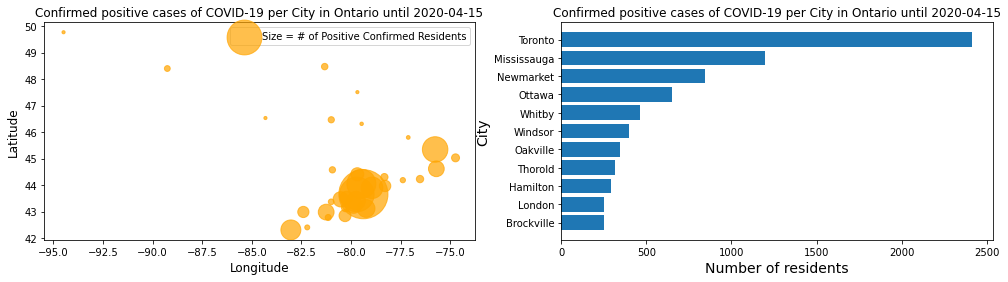

In [20]:
f = plt.figure(figsize=(17,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.scatter(long, lat, s=size, alpha=0.7, color='orange', label='Size = # of Positive Confirmed Residents')
ax1.set_xlabel('Longitude', fontsize=12)  # Add an x-label to the axes.
ax1.set_ylabel('Latitude', fontsize=12)  # Add a y-label to the axes.
ax1.set_title('Confirmed positive cases of COVID-19 per City in Ontario until ' + str(lastdate), fontsize=12);  # Add a title to the axes.
ax1.legend()

ax2.barh(cityname.index, cityname.values) #, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Number of residents', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('City', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Confirmed positive cases of COVID-19 per City in Ontario until ' + str(lastdate), fontsize=12);  # Add a title to the to the axes

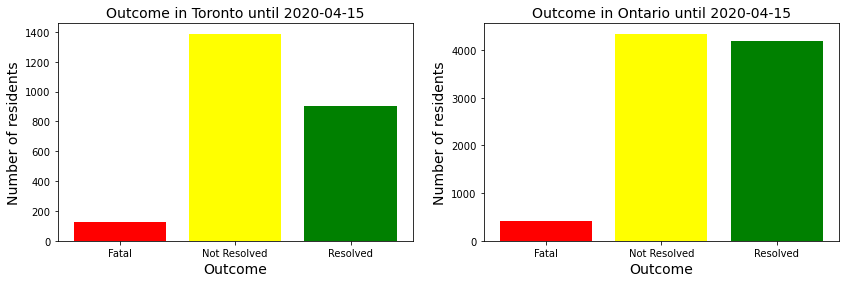

In [21]:
#plt.figure(figsize=(12,4))
#fig, (ax1, ax2) = plt.subplots(1, 2)
f = plt.figure(figsize=(14,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(outcome.index, outcome.values, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Outcome', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Outcome in Toronto until ' + str(lastdate), fontsize=14);  # Add a title to the axes.

ax2.bar(outcomeOnt.index, outcomeOnt.values, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Outcome', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Outcome in Ontario until ' + str(lastdateOnt), fontsize=14);  # Add a title to the axes.

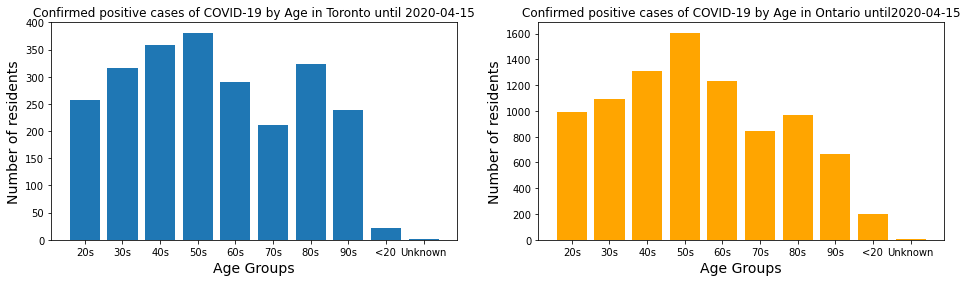

In [22]:
f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(agegrp.index, agegrp.values) #, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Age Groups', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Confirmed positive cases of COVID-19 by Age in Toronto until ' + str(lastdate), fontsize=12);  # Add a title to the axes.

ax2.bar(agegrpOnt.index, agegrpOnt.values, color='orange')
ax2.set_xlabel('Age Groups', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Confirmed positive cases of COVID-19 by Age in Ontario until' + str(lastdateOnt), fontsize=12);  # Add a title to the axes.

/Users/alexandredietrich/anaconda3/envs/uwaterloo/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


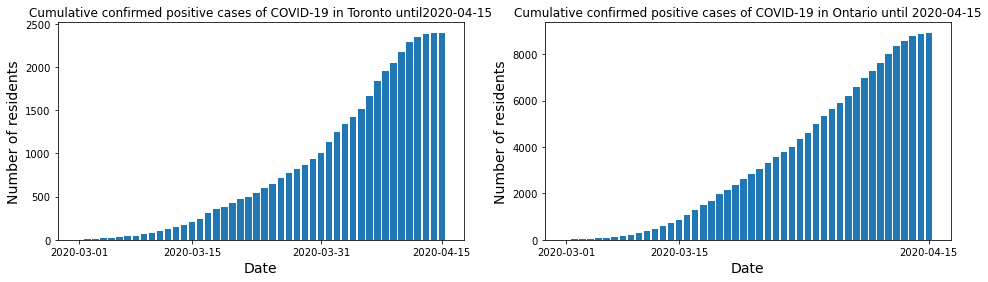

In [23]:
xticks = ['2020-03-01', '2020-03-15', '2020-03-31', lastdate]
xticksOnt = ['2020-03-01', '2020-03-15', '2020-03-31', lastdateOnt]

f = plt.figure(figsize=(16,4))


ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

xticksOnt = ['2020-03-01', '2020-03-15', lastdateOnt]

ax1.bar(cumulative.index, cumulative.values) #, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Cumulative confirmed positive cases of COVID-19 in Toronto until' + str(lastdate), fontsize=12)  # Add a title to the axes.
ax1.set_xticks(xticks);

ax2.bar(cumulativeOnt.index, cumulativeOnt.values) #, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Cumulative confirmed positive cases of COVID-19 in Ontario until ' + str(lastdateOnt), fontsize=12)  # Add a title to the axes.
ax2.set_xticks(xticksOnt);

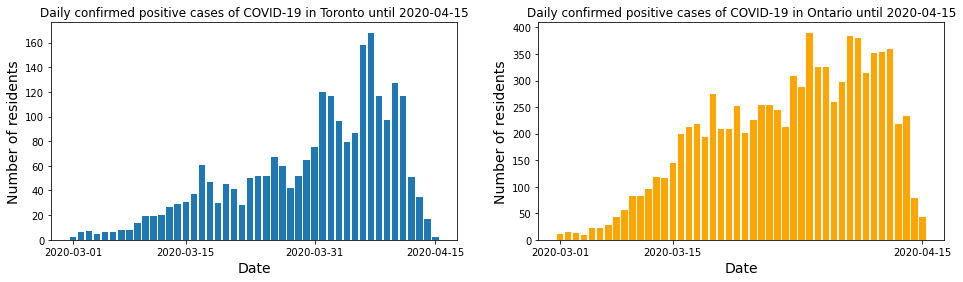

In [24]:
f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(byday.index, byday.values) #, color=['red', 'yellow', 'green'])
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Daily confirmed positive cases of COVID-19 in Toronto until ' + str(lastdate), fontsize=12)  # Add a title to the axes.
ax1.set_xticks(xticks);

ax2.bar(bydayOnt.index, bydayOnt.values, color='orange')
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Daily confirmed positive cases of COVID-19 in Ontario until ' + str(lastdateOnt), fontsize=12)  # Add a title to the axes.
ax2.set_xticks(xticksOnt);

## Dataset: Status of COVID-19 cases in Ontario

In [25]:
df1 = pd.read_csv("covidtesting.csv")
df1.tail()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19
66,2020-04-12,NaN,NaN,NaN,3654.0,3121.0,274.0,7049.0,103165.0,NaN,1619,738.0,261.0,196.0
67,2020-04-13,NaN,NaN,NaN,3822.0,3357.0,291.0,7470.0,108230.0,NaN,1534,760.0,263.0,203.0
68,2020-04-14,NaN,NaN,NaN,4051.0,3568.0,334.0,7953.0,113082.0,NaN,2107,769.0,255.0,199.0
69,2020-04-15,NaN,NaN,NaN,4160.0,3902.0,385.0,8447.0,119092.0,6010.0,4429,795.0,254.0,188.0
70,2020-04-16,NaN,NaN,NaN,4344.0,4194.0,423.0,8961.0,128093.0,9001.0,4323,807.0,248.0,200.0


In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
Reported Date                                               71 non-null object
Confirmed Negative                                          47 non-null float64
Presumptive Negative                                        12 non-null float64
Presumptive Positive                                        25 non-null float64
Confirmed Positive                                          69 non-null float64
Resolved                                                    59 non-null float64
Deaths                                                      31 non-null float64
Total Cases                                                 69 non-null float64
Total patients approved for testing as of Reporting Date    65 non-null float64
Total tests completed in the last day                       2 non-null float64
Under Investigation                                         71 non-null int64
Number of patients ho

In [27]:
df1.columns = ['date', 'confneg', 'presneg',  'prespos', 'confpos', 'resolved', 'deaths',  'totcases',
               'approvedtest', 'tested','underinvest', 'numpathosp', 'numpatICU', 'numpatventil']
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 14 columns):
date            71 non-null object
confneg         47 non-null float64
presneg         12 non-null float64
prespos         25 non-null float64
confpos         69 non-null float64
resolved        59 non-null float64
deaths          31 non-null float64
totcases        69 non-null float64
approvedtest    65 non-null float64
tested          2 non-null float64
underinvest     71 non-null int64
numpathosp      15 non-null float64
numpatICU       15 non-null float64
numpatventil    15 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 7.9+ KB


In [28]:
df1['date'] = pd.to_datetime(df1['date'], infer_datetime_format=True)
df1['pctchange'] = df1['totcases'].pct_change()
df1['dailycases'] = df1['totcases'].diff()

In [29]:
df1.tail()

,date,confneg,presneg,prespos,confpos,resolved,deaths,totcases,approvedtest,tested,underinvest,numpathosp,numpatICU,numpatventil,pctchange,dailycases
66,2020-04-12,NaN,NaN,NaN,3654.0,3121.0,274.0,7049.0,103165.0,NaN,1619,738.0,261.0,196.0,0.060319,401.0
67,2020-04-13,NaN,NaN,NaN,3822.0,3357.0,291.0,7470.0,108230.0,NaN,1534,760.0,263.0,203.0,0.059725,421.0
68,2020-04-14,NaN,NaN,NaN,4051.0,3568.0,334.0,7953.0,113082.0,NaN,2107,769.0,255.0,199.0,0.064659,483.0
69,2020-04-15,NaN,NaN,NaN,4160.0,3902.0,385.0,8447.0,119092.0,6010.0,4429,795.0,254.0,188.0,0.062115,494.0
70,2020-04-16,NaN,NaN,NaN,4344.0,4194.0,423.0,8961.0,128093.0,9001.0,4323,807.0,248.0,200.0,0.060850,514.0


In [30]:
totcasesOnt = df1[df1['date'] >= '2020-03-01'][['date', 'totcases', 'tested', 'deaths', 'resolved']]
lastdateOnt1 = df1['date'].max().date()
print(lastdateOnt1)
totcasesOnt.tail()

2020-04-16


,date,totcases,tested,deaths,resolved
66,2020-04-12,7049.0,NaN,274.0,3121.0
67,2020-04-13,7470.0,NaN,291.0,3357.0
68,2020-04-14,7953.0,NaN,334.0,3568.0
69,2020-04-15,8447.0,6010.0,385.0,3902.0
70,2020-04-16,8961.0,9001.0,423.0,4194.0


In [31]:
numpathospOnt = df1[df1['date'] >= '2020-03-31'][['date', 'numpathosp', 'numpatICU', 'numpatventil']]
numpathospOnt.tail()

,date,numpathosp,numpatICU,numpatventil
66,2020-04-12,738.0,261.0,196.0
67,2020-04-13,760.0,263.0,203.0
68,2020-04-14,769.0,255.0,199.0
69,2020-04-15,795.0,254.0,188.0
70,2020-04-16,807.0,248.0,200.0


In [32]:
confposOnt = df1[df1['date'] >= '2020-03-01'][['date', 'underinvest','confpos']]
confposOnt.tail()

,date,underinvest,confpos
66,2020-04-12,1619,3654.0
67,2020-04-13,1534,3822.0
68,2020-04-14,2107,4051.0
69,2020-04-15,4429,4160.0
70,2020-04-16,4323,4344.0


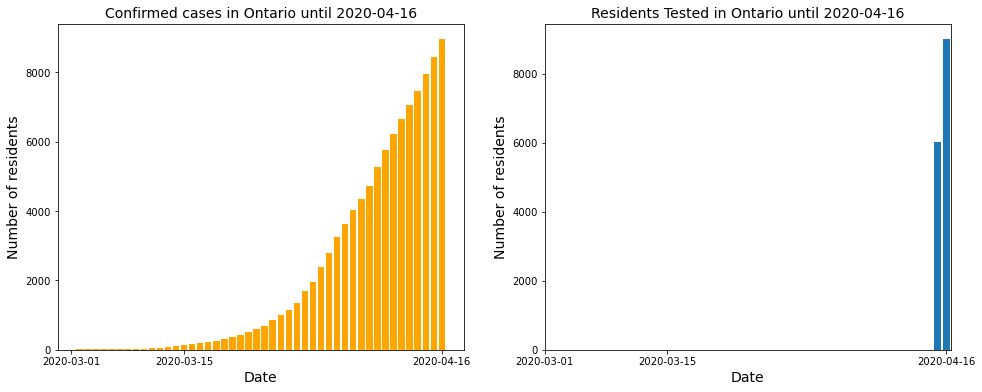

In [33]:
xticksOnt1 = ['2020-03-01', '2020-03-15', lastdateOnt1]

f = plt.figure(figsize=(16,6))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(totcasesOnt['date'], totcasesOnt['totcases'], color='orange')
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Confirmed cases in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1);

ax2.bar(totcasesOnt['date'], totcasesOnt['tested']) #, color=['red', 'yellow', 'green'])
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Residents Tested in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax2.set_xticks(xticksOnt1);

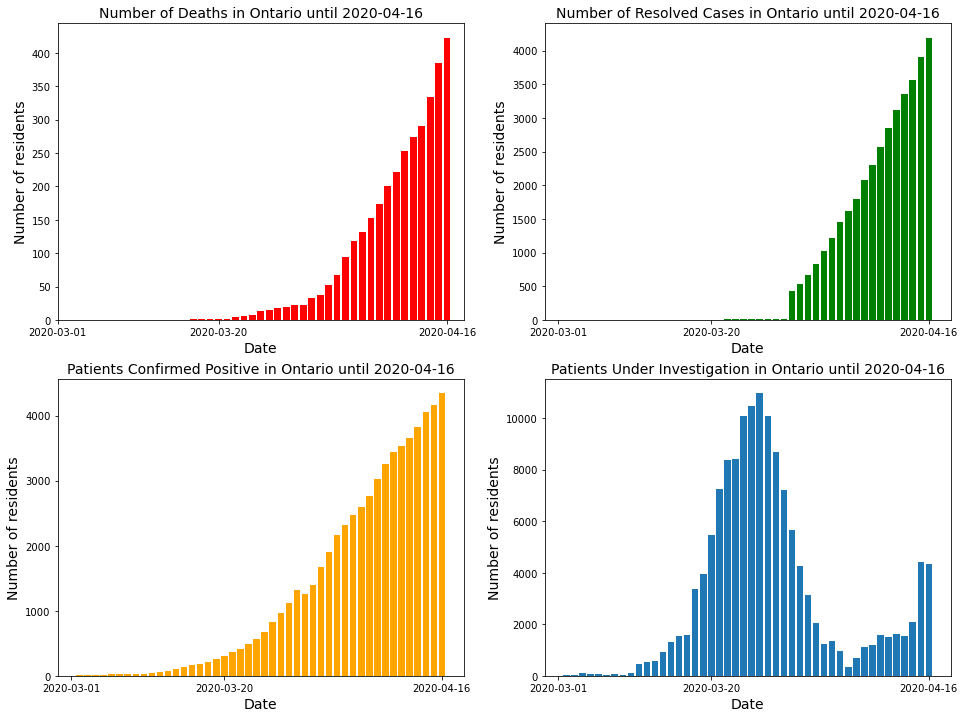

In [34]:
xticksOnt1 = ['2020-03-01', '2020-03-20', lastdateOnt1]

f = plt.figure(figsize=(16,12))

ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

ax1.bar(totcasesOnt['date'], totcasesOnt['deaths'], color='red')
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Number of Deaths in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1)

ax2.bar(totcasesOnt['date'], totcasesOnt['resolved'], color='green')
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Number of Resolved Cases in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax2.set_xticks(xticksOnt1)

ax3.bar(confposOnt['date'], confposOnt['confpos'], color='orange')
ax3.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax3.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax3.set_title('Patients Confirmed Positive in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax3.set_xticks(xticksOnt1)

ax4.bar(confposOnt['date'], confposOnt['underinvest']) #, color=['red', 'yellow', 'green'])
ax4.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax4.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax4.set_title('Patients Under Investigation in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax4.set_xticks(xticksOnt1);

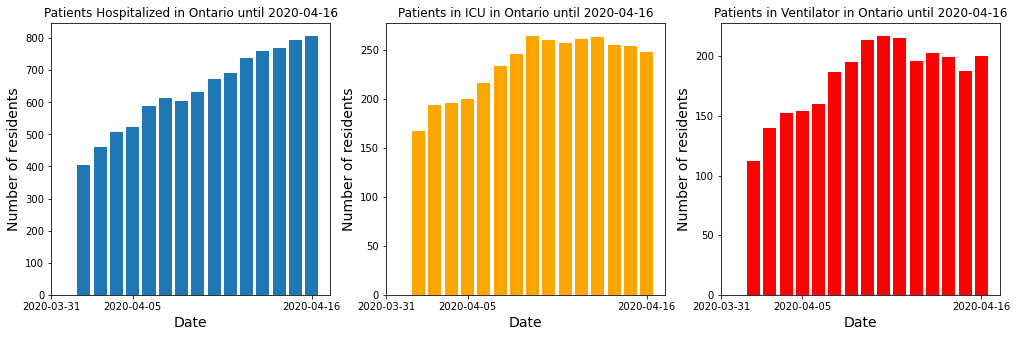

In [35]:
xticksOnt1 = ['2020-03-31', '2020-04-05', lastdateOnt1]

f = plt.figure(figsize=(17,5))

ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

ax1.bar(numpathospOnt['date'], numpathospOnt['numpathosp'])
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Patients Hospitalized in Ontario until ' + str(lastdateOnt1), fontsize=12);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1);

ax2.bar(numpathospOnt['date'], numpathospOnt['numpatICU'], color='orange')
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('Patients in ICU in Ontario until ' + str(lastdateOnt1), fontsize=12);  # Add a title to the axes.
ax2.set_xticks(xticksOnt1);

ax3.bar(numpathospOnt['date'], numpathospOnt['numpatventil'], color='red')
ax3.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax3.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax3.set_title('Patients in Ventilator in Ontario until ' + str(lastdateOnt1), fontsize=12);  # Add a title to the axes.
ax3.set_xticks(xticksOnt1);

### The progression of the cumulative contamination is different in the two datasets but the numbers are converging

In [36]:
cases = df[df['date'] >= '2020-03-01'].groupby('date')['date'].count().cumsum()
cases

date
2020-03-01      11
2020-03-02      25
2020-03-03      37
2020-03-04      46
2020-03-05      68
2020-03-06      90
2020-03-07     117
2020-03-08     159
2020-03-09     216
2020-03-10     298
2020-03-11     381
2020-03-12     476
2020-03-13     594
2020-03-14     711
2020-03-15     855
2020-03-16    1055
2020-03-17    1267
2020-03-18    1485
2020-03-19    1679
2020-03-20    1953
2020-03-21    2162
2020-03-22    2370
2020-03-23    2622
2020-03-24    2823
2020-03-25    3049
2020-03-26    3303
2020-03-27    3557
2020-03-28    3802
2020-03-29    4015
2020-03-30    4323
2020-03-31    4611
2020-04-01    5001
2020-04-02    5326
2020-04-03    5651
2020-04-04    5910
2020-04-05    6207
2020-04-06    6591
2020-04-07    6971
2020-04-08    7285
2020-04-09    7637
2020-04-10    7990
2020-04-11    8349
2020-04-12    8567
2020-04-13    8800
2020-04-14    8878
2020-04-15    8920
Name: date, dtype: int64

In [37]:
df2 = df1[df1['date'] >= '2020-03-01'][['date', 'totcases', 'pctchange', 'dailycases']]
df2.tail(10)

,date,totcases,pctchange,dailycases
61,2020-04-07,4726.0,0.087187,379.0
62,2020-04-08,5276.0,0.116377,550.0
63,2020-04-09,5759.0,0.091547,483.0
64,2020-04-10,6237.0,0.083001,478.0
65,2020-04-11,6648.0,0.065897,411.0
66,2020-04-12,7049.0,0.060319,401.0
67,2020-04-13,7470.0,0.059725,421.0
68,2020-04-14,7953.0,0.064659,483.0
69,2020-04-15,8447.0,0.062115,494.0
70,2020-04-16,8961.0,0.060850,514.0


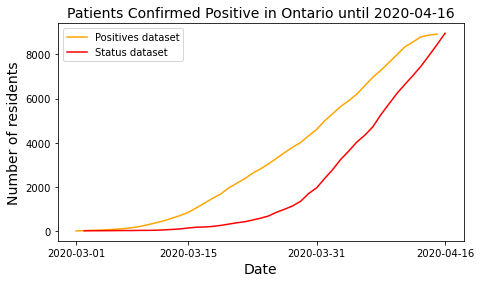

In [38]:
xticksOnt1 = ['2020-03-01', '2020-03-15','2020-03-31', lastdateOnt1]

f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)


ax1.plot(cases.index, cases.values, color='orange', label='Positives dataset')
ax1.plot(df2['date'], df2['totcases'], color='red', label='Status dataset')
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Number of residents', fontsize=14)  # Add a y-label to the axes.
ax1.set_title('Patients Confirmed Positive in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1)
ax1.legend();

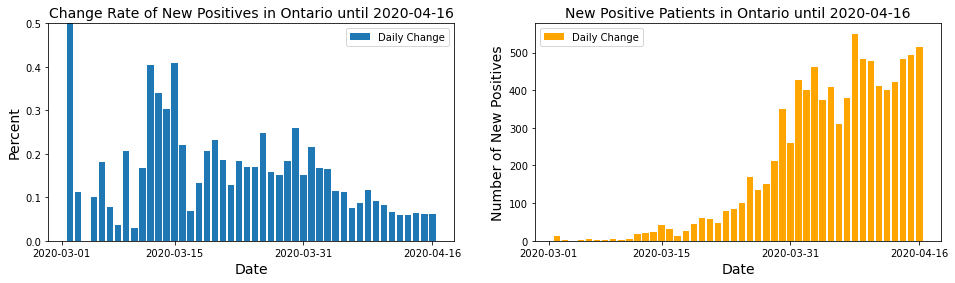

In [39]:
f = plt.figure(figsize=(16,4))

ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax1.bar(df2['date'], df2['pctchange'], label='Daily Change')
ax1.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax1.set_ylabel('Percent', fontsize=14)  # Add a y-label to the axes.
ax1.set_ylim(0, 0.5)
ax1.set_title('Change Rate of New Positives in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax1.set_xticks(xticksOnt1)
ax1.legend()

ax2.bar(df2['date'], df2['dailycases'], color='orange', label='Daily Change')
ax2.set_xlabel('Date', fontsize=14)  # Add an x-label to the axes.
ax2.set_ylabel('Number of New Positives', fontsize=14)  # Add a y-label to the axes.
ax2.set_title('New Positive Patients in Ontario until ' + str(lastdateOnt1), fontsize=14);  # Add a title to the axes.
ax2.set_xticks(xticksOnt1)
ax2.legend();